<a href="https://colab.research.google.com/github/Danisa-R/SoberUp/blob/main/drunk_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
 **installing/import dependecies**
```



In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5 & cd yolov5 && pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!cd yolov5 & pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') # load pretained torchub model

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-28 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# **Make Detections**

In [ ]:
# need to access google colab specific API -- Colab code exectures on a VM that doesn't have webcam attached
# (APIs that presume direct hardware access won't work)

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## **Detect thru video**

# **Real Time Detections**

In [ ]:
# from google.colab.patches import cv2_imshow
# TODO: fix google colab to connect to web API for webcam access
# cap = cv2.VideoCapture("traffic.mp4")
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [66]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving morgan_freeman.jpg to morgan_freeman.jpg
User uploaded file "morgan_freeman.jpg" with length 117008 bytes


# **Train from static photo images**

In [ ]:
# Train YOLOv5's on COCO128 for 3 epochs
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --nosave --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0,

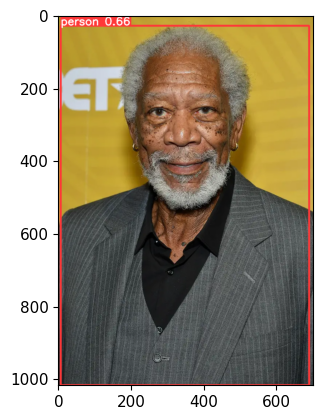

In [67]:
import uuid
import os
import time

IMAGES_PATH = os.path.join('data', 'images') #/data/images

labels = ['awake', 'drowsy']
for label in labels:
  print('Collecting images for {}'.format(label))
  for img_num in range(number_imgs):
    print('Collecting images for {}, image number {}'.format(label, img_num))
    image = '/content/yolov5/data/images/morgan_freeman.jpg'

    results = model(image)

    imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
    %matplotlib inline
    plt.imshow(np.squeeze(results.render()))
    plt.show

# **Train Model with Video/Webcam**

In [61]:
import uuid
import os
import time
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['drunk', 'sober']
number_imgs = 5

cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

error: ignored